In [1]:
import pandas as pd

data = pd.read_csv('data_2017_2022.csv', sep = ';')
data['fecha'] = pd.to_datetime(data['fecha'])
data['medicion'] = data['medicion'].str.replace(',', '.').astype(float)
data.drop(columns=['tipo'], inplace=True)
data.head()

,fecha,estacion,variable,medicion
0,2017-01-01 00:59:59+00:00,base_aerea,pm25,NaN
1,2017-01-01 00:59:59+00:00,base_aerea,so2,NaN
2,2017-01-01 00:59:59+00:00,base_aerea,lluvia,NaN
3,2017-01-01 00:59:59+00:00,base_aerea,o3,NaN
4,2017-01-01 00:59:59+00:00,base_aerea,temperatura,NaN


In [3]:
import pandas as pd

df_imputado = pd.read_csv("datos_imputados 1.csv")

In [8]:
df_imputado.head()

,Unnamed: 0,fecha,estacion,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,...,uv-pm,velocidad_viento,fecha_,Year,Mes,pm10_LOCF,pm10_linear_interpolation,pm10_moving_average,pm10_kalman,pm10_arima
0,4,2017-01-01 00:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-01-01,2017,1,61.9,61.9,61.9,61.9,61.9
1,13,2017-01-01 01:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-01-01,2017,1,101.0,101.0,101.0,101.0,101.0
2,22,2017-01-01 02:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-01-01,2017,1,75.6,75.6,75.6,75.6,75.6
3,31,2017-01-01 03:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-01-01,2017,1,56.3,56.3,56.3,56.3,56.3
4,40,2017-01-01 04:59:59+00:00,ermita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-01-01,2017,1,107.1,107.1,107.1,107.1,107.1


In [10]:
df_imputado[['fecha', 'pm10_arima']].rename(columns={'pm10_arima':'pm10'}).to_csv('data_input.csv', index=False)

In [19]:
# Define the function to calculate null percentage
def null_percentage(df):
    """
    This function calculates the percentage of null values per column in a DataFrame.
    """
    null_counts = df.isnull().sum()
    total_counts = df.shape[0]
    null_percentages = (null_counts / total_counts) * 100
    return null_percentages

# Process data for each station and compute the null percentage
stations = data['estacion'].unique()
null_percentage_results = {}

for station in stations:
    data_current_estacion = data[data['estacion'] == station].copy()
    pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()
    null_percentage_results[station] = null_percentage(pivoted_data_current_estacion)

# Convert results to a DataFrame for better visualization
null_percentage_df = pd.DataFrame(null_percentage_results).T  # Transpose to get stations as rows

# fill null values with 100 (meaning 100% of null values)
null_percentage_df = null_percentage_df.fillna(100)

# format numbers
numeric_cols = null_percentage_df.select_dtypes(include=['number']).columns.tolist()

for col in numeric_cols:
    null_percentage_df[col] = null_percentage_df[col].astype("int64")
    
null_percentage_df

variable,black_carbon,direccion_viento,fecha,h2s,humedad,lluvia,no2,o3,pm10,pm25,presion,radiacion_solar,so2,temperatura,temperatura_10_m,uv-pm,velocidad_viento
base_aerea,100,96,0,100,100,77,100,39,100,38,100,100,49,28,100,100,96
compartir,100,5,0,100,13,5,100,33,27,37,5,6,100,5,86,100,5
univalle,83,45,0,100,49,45,99,48,77,33,49,58,100,49,100,83,45
canaveralejo,100,38,0,100,43,53,100,100,40,80,58,66,42,43,100,100,38
ermita,100,100,0,100,48,100,100,100,25,73,56,100,36,37,100,100,100
era_obrero,100,41,0,100,52,4,100,33,33,72,52,11,100,68,100,100,41
flora,100,50,0,78,53,8,100,36,32,70,54,14,47,53,100,100,51
pance,100,32,0,100,33,9,100,39,31,75,57,21,100,37,87,100,30
transitoria,100,100,0,92,67,100,100,85,85,85,67,100,72,67,100,100,100


In [13]:
data.head(500000).to_csv("data_input.csv", index=False)

In [5]:
len(data)

4084061

In [6]:
len(data)

4084061

In [7]:
len(data)

4084061

In [8]:
data['estacion'].unique()

array(['base_aerea', 'compartir', 'univalle', 'canaveralejo', 'ermita',
       'era_obrero', 'flora', 'pance', 'transitoria'], dtype=object)

# segmentando por estacion

In [9]:
# funcion para detectar nulos por estacion
def null_percentage(df):
    """
    This function receives a DataFrame and returns the percentage of null values per column.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    pd.Series: A Series containing the percentage of null values for each column.
    """
    null_counts = df.isnull().sum()
    total_counts = df.shape[0]
    null_percentages = (null_counts / total_counts) * 100
    return null_percentages

## base aerea

In [10]:
data_current_estacion = data[data['estacion']=='base_aerea'].copy()
data_current_estacion.drop(columns=['estacion'], inplace=True)

# Pivot the table to spread 'variable' values into separate columns
pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()

null_percentage(pivoted_data_current_estacion)

variable
fecha                0.000000
direccion_viento    96.215579
lluvia              77.888711
o3                  39.257188
pm25                38.814088
so2                 49.534079
temperatura         28.442112
velocidad_viento    96.223186
dtype: float64

## compartir

In [7]:
data_current_estacion = data[data['estacion']=='compartir'].copy()
data_current_estacion.drop(columns=['estacion'], inplace=True)

# Pivot the table to spread 'variable' values into separate columns
pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()

# Remove the records before the first non-null record and after the last non-null record for the pm10 variable
first_valid_index = pivoted_data_current_estacion['pm10'].first_valid_index()
last_valid_index = pivoted_data_current_estacion['pm10'].last_valid_index()
pivoted_data_current_estacion = pivoted_data_current_estacion.loc[first_valid_index:last_valid_index]

null_percentage(pivoted_data_current_estacion)

variable
fecha                0.000000
direccion_viento     5.886921
humedad             13.688257
lluvia               5.888863
o3                  31.768406
pm10                25.669851
pm25                36.354458
presion              5.888863
radiacion_solar      6.189811
temperatura          5.904396
temperatura_10_m    88.164026
velocidad_viento     5.886921
dtype: float64

In [8]:
len(pivoted_data_current_estacion)

51504

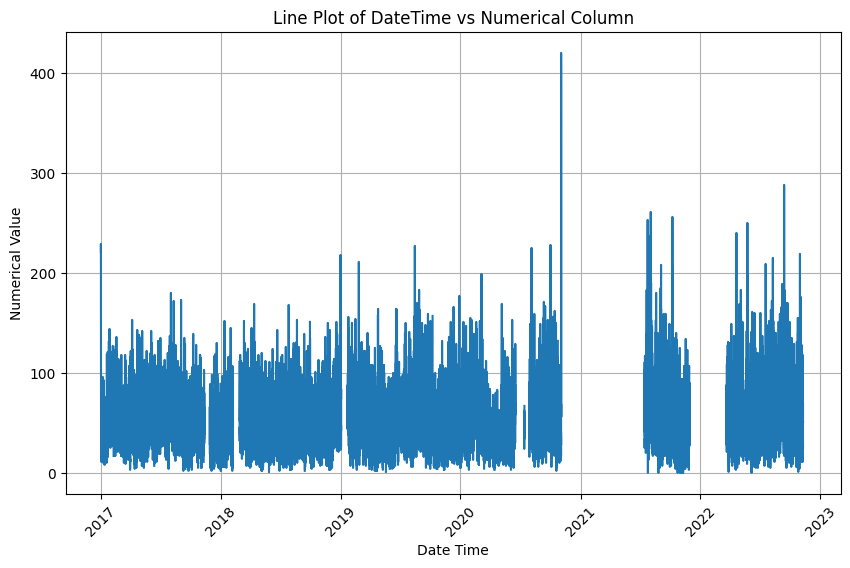

In [9]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(
    pivoted_data_current_estacion['fecha'],
    pivoted_data_current_estacion['pm10'],
)

# Formatting the plot
plt.xlabel('Date Time')
plt.ylabel('Numerical Value')
plt.title('Line Plot of DateTime vs Numerical Column')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

## univalle

In [10]:
data_current_estacion = data[data['estacion']=='univalle'].copy()
data_current_estacion.drop(columns=['estacion'], inplace=True)

# Pivot the table to spread 'variable' values into separate columns
pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()

# Remove the records before the first non-null record and after the last non-null record for the pm10 variable
first_valid_index = pivoted_data_current_estacion['pm10'].first_valid_index()
last_valid_index = pivoted_data_current_estacion['pm10'].last_valid_index()
pivoted_data_current_estacion = pivoted_data_current_estacion.loc[first_valid_index:last_valid_index]

null_percentage(pivoted_data_current_estacion)

variable
fecha                0.000000
black_carbon        65.887699
direccion_viento     3.055594
humedad              3.046321
lluvia               3.046321
no2                 99.995363
o3                  64.770251
pm10                45.180136
pm25                55.102703
presion              3.050957
radiacion_solar     21.699819
temperatura          3.050957
uv-pm               65.887699
velocidad_viento     3.055594
dtype: float64

In [11]:
len(pivoted_data_current_estacion)

21567

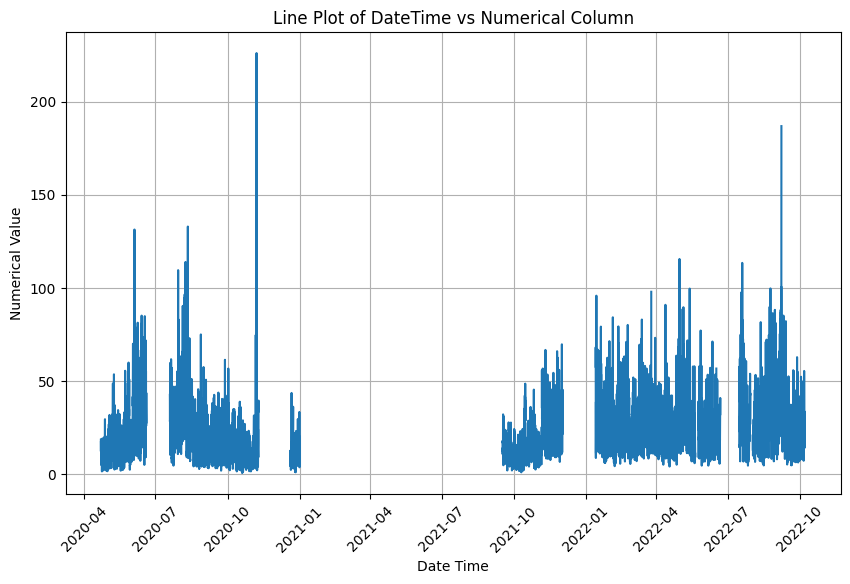

In [12]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(
    pivoted_data_current_estacion['fecha'],
    pivoted_data_current_estacion['pm10'],
)

# Formatting the plot
plt.xlabel('Date Time')
plt.ylabel('Numerical Value')
plt.title('Line Plot of DateTime vs Numerical Column')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

## canaveralejo

In [13]:
data_current_estacion = data[data['estacion']=='canaveralejo'].copy()
data_current_estacion.drop(columns=['estacion'], inplace=True)

# Pivot the table to spread 'variable' values into separate columns
pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()

# Remove the records before the first non-null record and after the last non-null record for the pm10 variable
first_valid_index = pivoted_data_current_estacion['pm10'].first_valid_index()
last_valid_index = pivoted_data_current_estacion['pm10'].last_valid_index()
pivoted_data_current_estacion = pivoted_data_current_estacion.loc[first_valid_index:last_valid_index]

null_percentage(pivoted_data_current_estacion)

variable
fecha                0.000000
direccion_viento    32.852484
humedad             38.593410
lluvia              49.642499
pm10                35.007944
pm25                78.031443
presion             55.529771
radiacion_solar     63.555779
so2                 36.843536
temperatura         38.599682
velocidad_viento    32.867118
dtype: float64

In [14]:
len(pivoted_data_current_estacion)

47832

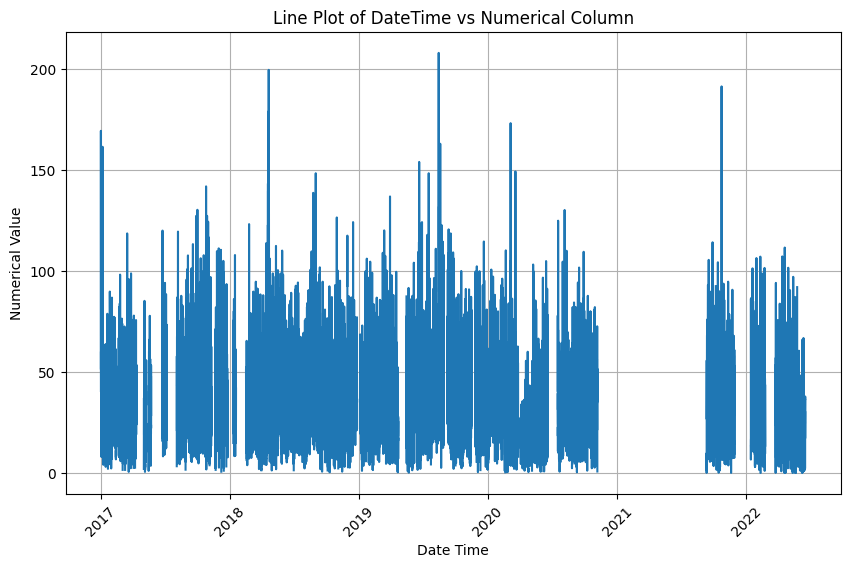

In [15]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(
    pivoted_data_current_estacion['fecha'],
    pivoted_data_current_estacion['pm10'],
)

# Formatting the plot
plt.xlabel('Date Time')
plt.ylabel('Numerical Value')
plt.title('Line Plot of DateTime vs Numerical Column')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

## ermita

In [16]:
data_current_estacion = data[data['estacion']=='ermita'].copy()
data_current_estacion.drop(columns=['estacion'], inplace=True)

# Pivot the table to spread 'variable' values into separate columns
pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()

# Remove the records before the first non-null record and after the last non-null record for the pm10 variable
first_valid_index = pivoted_data_current_estacion['pm10'].first_valid_index()
last_valid_index = pivoted_data_current_estacion['pm10'].last_valid_index()
pivoted_data_current_estacion = pivoted_data_current_estacion.loc[first_valid_index:last_valid_index]

null_percentage(pivoted_data_current_estacion)

variable
fecha           0.000000
humedad        49.761458
pm10           23.404505
pm25           72.864852
presion        57.823010
so2            34.545597
temperatura    38.636008
dtype: float64

In [17]:
len(pivoted_data_current_estacion)

51144

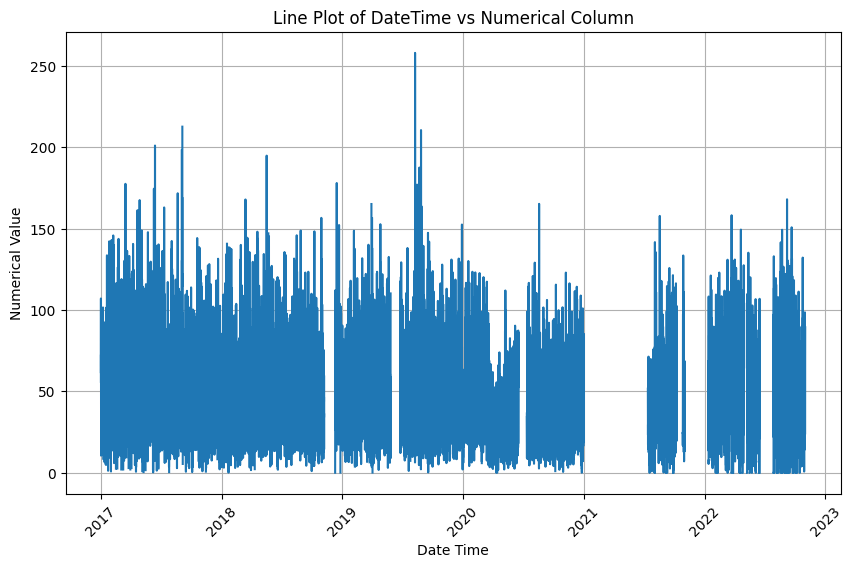

In [18]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(
    pivoted_data_current_estacion['fecha'],
    pivoted_data_current_estacion['pm10'],
)

# Formatting the plot
plt.xlabel('Date Time')
plt.ylabel('Numerical Value')
plt.title('Line Plot of DateTime vs Numerical Column')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

## era_obrero

In [19]:
data_current_estacion = data[data['estacion']=='era_obrero'].copy()
data_current_estacion.drop(columns=['estacion'], inplace=True)

# Pivot the table to spread 'variable' values into separate columns
pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()

# Remove the records before the first non-null record and after the last non-null record for the pm10 variable
first_valid_index = pivoted_data_current_estacion['pm10'].first_valid_index()
last_valid_index = pivoted_data_current_estacion['pm10'].last_valid_index()
pivoted_data_current_estacion = pivoted_data_current_estacion.loc[first_valid_index:last_valid_index]

null_percentage(pivoted_data_current_estacion)

variable
fecha                0.000000
direccion_viento    42.777260
humedad             53.174511
lluvia               4.320053
o3                  31.863545
pm10                31.801413
pm25                71.864321
presion             53.213343
radiacion_solar     11.265144
temperatura         68.074324
velocidad_viento    42.777260
dtype: float64

In [20]:
len(pivoted_data_current_estacion)

51504

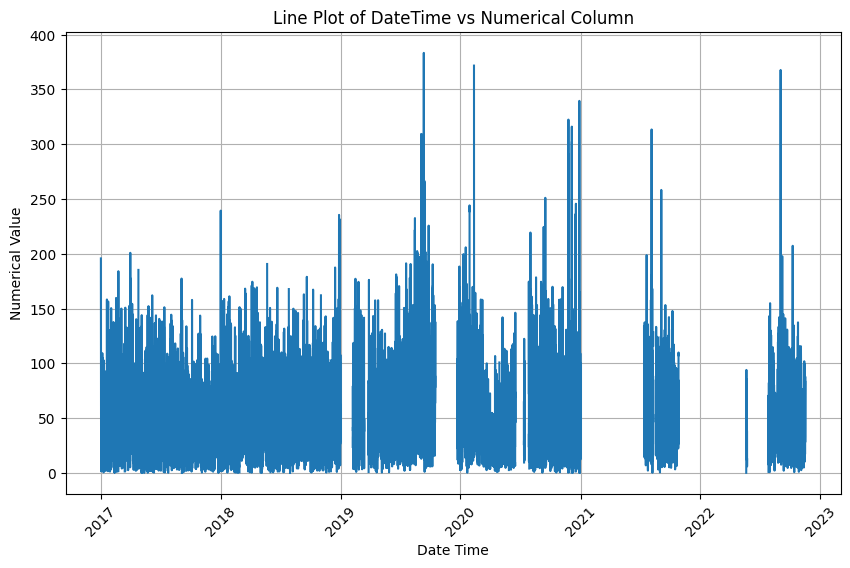

In [21]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(
    pivoted_data_current_estacion['fecha'],
    pivoted_data_current_estacion['pm10'],
)

# Formatting the plot
plt.xlabel('Date Time')
plt.ylabel('Numerical Value')
plt.title('Line Plot of DateTime vs Numerical Column')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

## flora

In [22]:
data_current_estacion = data[data['estacion']=='flora'].copy()
data_current_estacion.drop(columns=['estacion'], inplace=True)

# Pivot the table to spread 'variable' values into separate columns
pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()

# Remove the records before the first non-null record and after the last non-null record for the pm10 variable
first_valid_index = pivoted_data_current_estacion['pm10'].first_valid_index()
last_valid_index = pivoted_data_current_estacion['pm10'].last_valid_index()
pivoted_data_current_estacion = pivoted_data_current_estacion.loc[first_valid_index:last_valid_index]

null_percentage(pivoted_data_current_estacion)

variable
fecha                0.000000
direccion_viento    49.598534
h2s                 80.318444
humedad             54.347911
lluvia               8.154038
o3                  34.958684
pm10                30.624415
pm25                70.164874
presion             55.840739
radiacion_solar     15.189429
so2                 46.443327
temperatura         54.347911
velocidad_viento    49.871375
dtype: float64

In [23]:
len(pivoted_data_current_estacion)

51312

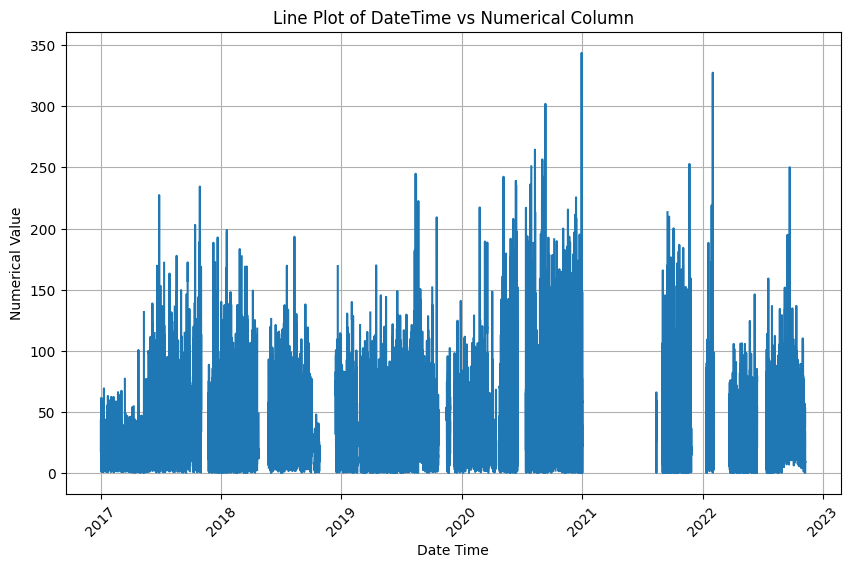

In [24]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(
    pivoted_data_current_estacion['fecha'],
    pivoted_data_current_estacion['pm10'],
    # marker='o'
)

# Formatting the plot
plt.xlabel('Date Time')
plt.ylabel('Numerical Value')
plt.title('Line Plot of DateTime vs Numerical Column')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

## pance

In [25]:
data_current_estacion = data[data['estacion']=='pance'].copy()
data_current_estacion.drop(columns=['estacion'], inplace=True)

# Pivot the table to spread 'variable' values into separate columns
pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()

# Remove the records before the first non-null record and after the last non-null record for the pm10 variable
first_valid_index = pivoted_data_current_estacion['pm10'].first_valid_index()
last_valid_index = pivoted_data_current_estacion['pm10'].last_valid_index()
pivoted_data_current_estacion = pivoted_data_current_estacion.loc[first_valid_index:last_valid_index]

null_percentage(pivoted_data_current_estacion)

variable
fecha                0.000000
direccion_viento    33.843418
humedad             34.111163
lluvia               9.265557
o3                  37.949500
pm10                30.102799
pm25                74.312070
presion             58.573718
radiacion_solar     22.400719
temperatura         38.510397
temperatura_10_m    89.899937
velocidad_viento    31.619371
dtype: float64

In [26]:
len(pivoted_data_current_estacion)

51168

In [27]:
pivoted_data_current_estacion[['fecha', 'pm10']].to_csv("to_input_dataset_estacion_pance.csv", index=False)

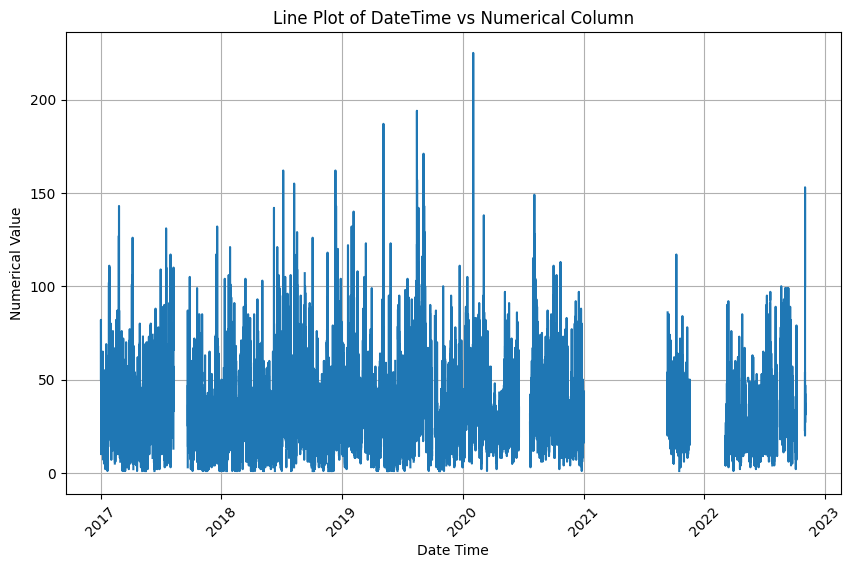

In [28]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(
    pivoted_data_current_estacion['fecha'],
    pivoted_data_current_estacion['pm10'],
)

# Formatting the plot
plt.xlabel('Date Time')
plt.ylabel('Numerical Value')
plt.title('Line Plot of DateTime vs Numerical Column')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

## transitoria

In [28]:
data_current_estacion = data[data['estacion']=='transitoria'].copy()
data_current_estacion.drop(columns=['estacion'], inplace=True)

# Pivot the table to spread 'variable' values into separate columns
pivoted_data_current_estacion = data_current_estacion.pivot(index='fecha', columns='variable', values='medicion').reset_index().drop_duplicates()

# Remove the records before the first non-null record and after the last non-null record for the pm10 variable
first_valid_index = pivoted_data_current_estacion['pm10'].first_valid_index()
last_valid_index = pivoted_data_current_estacion['pm10'].last_valid_index()
pivoted_data_current_estacion = pivoted_data_current_estacion.loc[first_valid_index:last_valid_index]

null_percentage(pivoted_data_current_estacion)

variable
fecha            0.000000
h2s            100.000000
humedad        100.000000
o3             100.000000
pm10            24.241234
pm25           100.000000
presion        100.000000
so2            100.000000
temperatura    100.000000
dtype: float64

In [29]:
len(pivoted_data_current_estacion)

10181

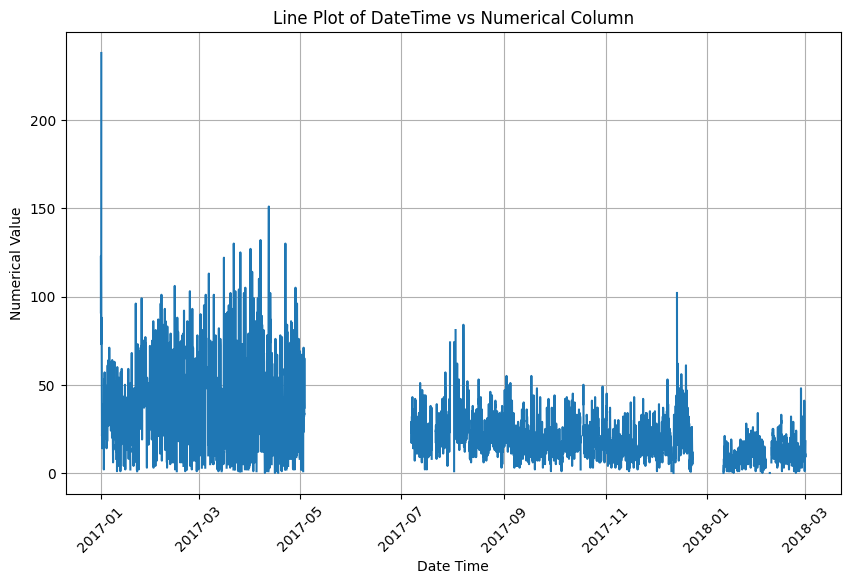

In [30]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(
    pivoted_data_current_estacion['fecha'],
    pivoted_data_current_estacion['pm10'],
    # marker='o'
)

# Formatting the plot
plt.xlabel('Date Time')
plt.ylabel('Numerical Value')
plt.title('Line Plot of DateTime vs Numerical Column')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

# TODAS LAS VARIABLES

In [31]:
# Pivot the table to spread 'variable' values into separate columns
pivoted_data = data.pivot_table(index=['fecha', 'estacion'], columns='variable', values='medicion', aggfunc='first').reset_index()

# Apply one-hot encoding to the 'estacion' column
one_hot_encoded_data = pd.get_dummies(pivoted_data, columns=['estacion'], prefix='estacion')

# Display the transformed dataframe
one_hot_encoded_data.drop_duplicates()

,fecha,black_carbon,direccion_viento,h2s,humedad,lluvia,no2,o3,pm10,pm25,...,velocidad_viento,estacion_base_aerea,estacion_canaveralejo,estacion_compartir,estacion_era_obrero,estacion_ermita,estacion_flora,estacion_pance,estacion_transitoria,estacion_univalle
0,2017-01-01 00:59:59+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.7,NaN,...,NaN,0,1,0,0,0,0,0,0,0
1,2017-01-01 00:59:59+00:00,NaN,208.6,NaN,75.9,0.0,NaN,8.456252,221.0,161.0,...,1.4,0,0,1,0,0,0,0,0,0
2,2017-01-01 00:59:59+00:00,NaN,NaN,NaN,NaN,0.0,NaN,16.147321,195.8,NaN,...,NaN,0,0,0,1,0,0,0,0,0
3,2017-01-01 00:59:59+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.9,NaN,...,NaN,0,0,0,0,1,0,0,0,0
4,2017-01-01 00:59:59+00:00,NaN,NaN,NaN,NaN,0.0,NaN,8.534732,17.7,NaN,...,NaN,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419538,2022-12-31 23:59:59+00:00,NaN,213.3,NaN,84.8,0.0,NaN,NaN,NaN,NaN,...,0.4,0,0,0,1,0,0,0,0,0
419539,2022-12-31 23:59:59+00:00,NaN,NaN,NaN,93.1,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,1,0,0,0,0
419540,2022-12-31 23:59:59+00:00,NaN,NaN,0.041796,84.8,0.0,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,1,0,0,0
419541,2022-12-31 23:59:59+00:00,NaN,266.7,NaN,97.7,0.0,NaN,NaN,NaN,NaN,...,0.7,0,0,0,0,0,0,1,0,0


# importando datos imputados

In [31]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('data_input.csv')
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Crear características de entrada (lags)
def create_lags(data, n_lags=5):
    df = pd.DataFrame(data)
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df['pm10'].shift(i)
    df = df.dropna()
    return df

n_lags = 5
df_lags = create_lags(data['pm10'], n_lags)

In [32]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(df_lags) * 0.8)
train, test = df_lags.iloc[:train_size], df_lags.iloc[train_size:]

X_train, y_train = train.drop('pm10', axis=1), train['pm10']
X_test, y_test = test.drop('pm10', axis=1), test['pm10']

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Entrenar el modelo SVR
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train_scaled, y_train)

SVR(C=1000.0, gamma=0.1)

Train MAE: 7.977
Test MAE: 7.711
Train MSE: 155.939
Test MSE: 173.660
Train RMSE: 12.488
Test RMSE: 13.178
Train MAPE: inf%
Test MAPE: inf%


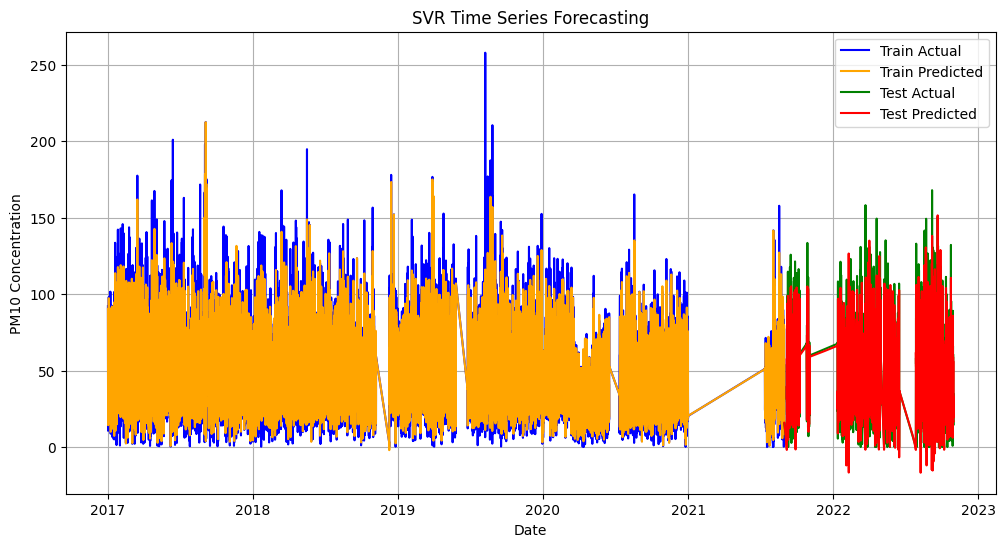

In [34]:
# Hacer predicciones
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = svr.predict(X_test_scaled)

# Evaluar el modelo
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mape = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print(f'Train MAE: {train_mae:.3f}')
print(f'Test MAE: {test_mae:.3f}')
print(f'Train MSE: {train_mse:.3f}')
print(f'Test MSE: {test_mse:.3f}')
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
print(f'Train MAPE: {train_mape:.3f}%')
print(f'Test MAPE: {test_mape:.3f}%')

# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(train.index, y_train, label='Train Actual', color='blue')
plt.plot(train.index, y_pred_train, label='Train Predicted', color='orange')
plt.plot(test.index, y_test, label='Test Actual', color='green')
plt.plot(test.index, y_pred_test, label='Test Predicted', color='red')
plt.title('SVR Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration')
plt.legend()
plt.grid(True)
plt.show()

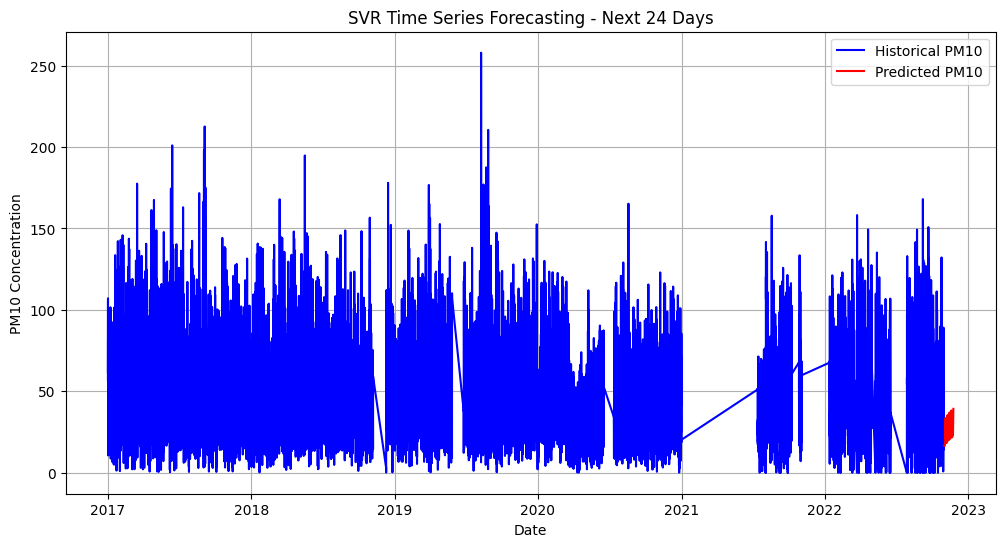

,Predicted PM10
2022-10-31 23:59:59+00:00,16.605057
2022-11-01 23:59:59+00:00,16.458204
2022-11-02 23:59:59+00:00,18.084103
2022-11-03 23:59:59+00:00,33.538302
2022-11-04 23:59:59+00:00,19.717865
2022-11-05 23:59:59+00:00,18.321488
2022-11-06 23:59:59+00:00,18.348433
2022-11-07 23:59:59+00:00,20.120026
2022-11-08 23:59:59+00:00,35.404411
2022-11-09 23:59:59+00:00,21.882207


In [35]:
# Hacer predicciones para los próximos 24 días
last_known_data = df_lags.iloc[-n_lags:].drop('pm10', axis=1).values[-1].tolist()
predictions = []

for _ in range(24):
    last_known_df = pd.DataFrame([last_known_data], columns=X_train.columns)
    next_pred = svr.predict(scaler.transform(last_known_df))[0]
    predictions.append(next_pred)
    last_known_data = last_known_data[1:] + [next_pred]

# Crear un DataFrame con las predicciones
future_dates = pd.date_range(start=data.index[-1], periods=25, closed='right')
predictions_df = pd.DataFrame(predictions, index=future_dates, columns=['Predicted PM10'])

# Visualizar las predicciones futuras
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['pm10'], label='Historical PM10', color='blue')
plt.plot(predictions_df.index, predictions_df['Predicted PM10'], label='Predicted PM10', color='red')
plt.title('SVR Time Series Forecasting - Next 24 Days')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar las predicciones
predictions_df

independencia de los errores

<Figure size 1200x600 with 0 Axes>

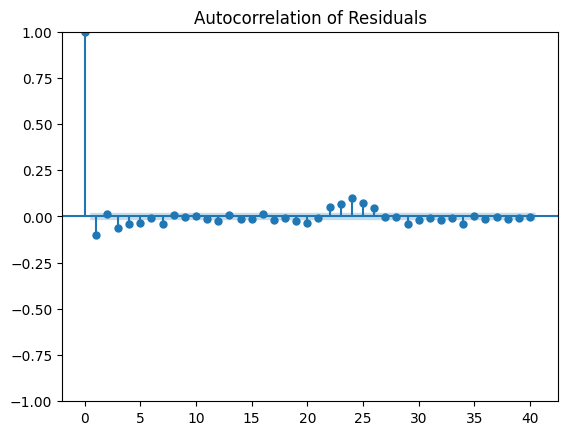

Ljung-Box Test Results:
       lb_stat     lb_pvalue
10  189.720199  2.235682e-35


In [36]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Calcular los residuos
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Graficar la autocorrelación de los residuos
plt.figure(figsize=(12, 6))
plot_acf(residuals_test, lags=40, alpha=0.05)
plt.title('Autocorrelation of Residuals')
plt.show()

# Realizar la prueba de Ljung-Box
ljung_box_result = acorr_ljungbox(residuals_test, lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_box_result)

# usando data test de karina

<Figure size 1200x600 with 0 Axes>

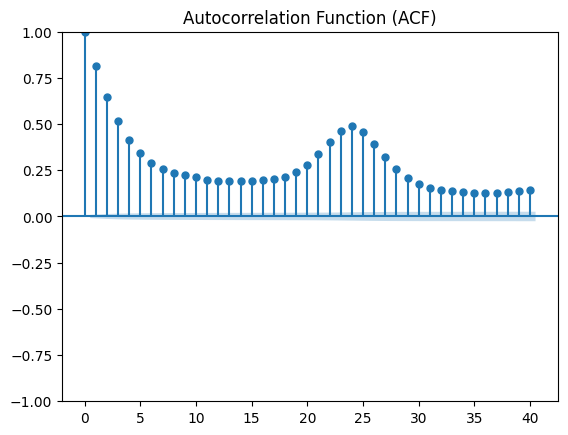

<Figure size 1200x600 with 0 Axes>

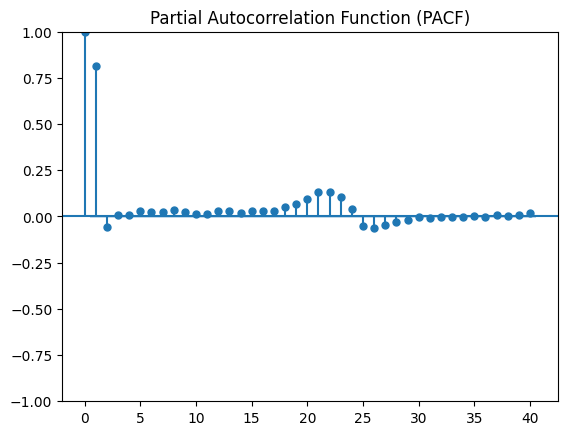

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Cargar los datos
data = pd.read_csv('data_input.csv')
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Graficar la función de autocorrelación y autocorrelación parcial
plt.figure(figsize=(12, 6))
plot_acf(data['pm10'].dropna(), lags=40, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['pm10'].dropna(), lags=40, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [38]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Paso 1: Importar y preparar los datos originales
data = pd.read_csv('data_input.csv')
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)

# Crear características de entrada (lags)
def create_lags(data, n_lags=5):
    df = pd.DataFrame(data)
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df['pm10'].shift(i)
    df = df.dropna()
    return df

n_lags = 5
df_lags = create_lags(data['pm10'], n_lags)

# Paso 2: Dividir los datos en conjuntos de entrenamiento y validación
train_size = int(len(df_lags) * 0.8)
train = df_lags.iloc[:train_size]
val = df_lags.iloc[train_size:]

X_train, y_train = train.drop('pm10', axis=1), train['pm10']
X_val, y_val = val.drop('pm10', axis=1), val['pm10']

# Paso 3: Estandarizar las características y entrenar el modelo SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [43]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5
fecha,,,,,
2017-01-01 05:59:59+00:00,107.100000,56.300000,75.600000,101.0,61.9
2017-01-01 06:59:59+00:00,92.100000,107.100000,56.300000,75.6,101.0
2017-01-01 07:59:59+00:00,82.500000,92.100000,107.100000,56.3,75.6
2017-01-01 08:59:59+00:00,55.300000,82.500000,92.100000,107.1,56.3
2017-01-01 09:59:59+00:00,72.600000,55.300000,82.500000,92.1,107.1
...,...,...,...,...,...
2021-08-31 00:59:59+00:00,8.200000,19.400000,26.900000,33.7,47.1
2021-08-31 01:59:59+00:00,16.200000,8.200000,19.400000,26.9,33.7
2021-08-31 02:59:59+00:00,15.749053,16.200000,8.200000,19.4,26.9


In [39]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train_scaled, y_train)

SVR(C=1000.0, gamma=0.1)

Test MAE: 12.813
Test MSE: 319.307
Test RMSE: 17.869
Test MAPE: 25.228%


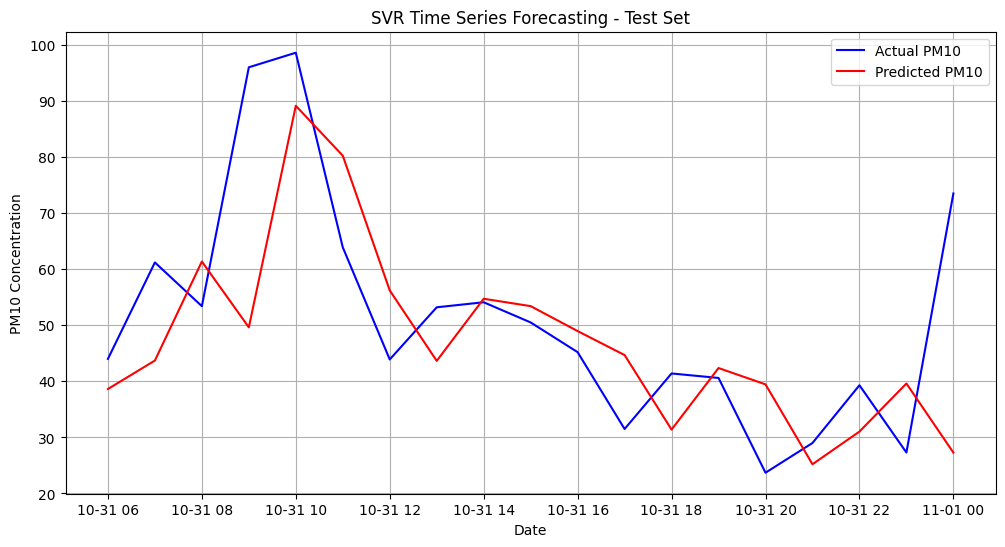

In [41]:
# Paso 4: Importar el archivo CSV con los datos de prueba (últimas 24 horas)
test_data = pd.read_csv('test_data.csv')
test_data['fecha'] = pd.to_datetime(test_data['fecha'])
test_data.set_index('fecha', inplace=True)

# Crear características de entrada (lags) para los datos de prueba
test_lags = create_lags(test_data['pm10'], n_lags)

X_test, y_test = test_lags.drop('pm10', axis=1), test_lags['pm10']

# Estandarizar las características de prueba
X_test_scaled = scaler.transform(X_test)

# Hacer predicciones en el conjunto de prueba
y_pred_test = svr.predict(X_test_scaled)

# Paso 5: Evaluar el modelo en el conjunto de prueba y visualizar las predicciones
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print(f'Test MAE: {test_mae:.3f}')
print(f'Test MSE: {test_mse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
print(f'Test MAPE: {test_mape:.3f}%')

# Visualizar las predicciones futuras en el conjunto de prueba
plt.figure(figsize=(12, 6))
plt.plot(test_lags.index, y_test, label='Actual PM10', color='blue')
plt.plot(test_lags.index, y_pred_test, label='Predicted PM10', color='red')
plt.title('SVR Time Series Forecasting - Test Set')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration')
plt.legend()
plt.grid(True)
plt.show()

# ARIMA SVR

Importar y Preparar Datos:


In [51]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Cargar los datos
data = pd.read_csv('data_input.csv')
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)
data = data.asfreq('H')  # Establecer la frecuencia explícitamente

# Crear características de entrada (lags)
def create_lags(data, n_lags=5):
    df = pd.DataFrame(data)
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df['pm10'].shift(i)
    df = df.dropna()
    return df

n_lags = 5
df_lags = create_lags(data['pm10'], n_lags)

# Dividir los datos en conjuntos de entrenamiento y validación
train_size = int(len(df_lags) * 0.8)
train = df_lags.iloc[:train_size]
val = df_lags.iloc[train_size:]

X_train, y_train = train.drop('pm10', axis=1), train['pm10']
X_val, y_val = val.drop('pm10', axis=1), val['pm10']

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Ajuste del Modelo ARIMA y Obtención de Residuos:

In [53]:
# Ajustar el modelo ARIMA
arima_order = (2, 1, 2)  # Este es un ejemplo, deberías ajustar los hiperparámetros de ARIMA según tus datos
arima_model = ARIMA(y_train, order=arima_order)
arima_fit = arima_model.fit()

# Obtener los residuos del modelo ARIMA
residuals_train = arima_fit.resid

# Ajustar el modelo ARIMA en el conjunto de validación
arima_val_pred = arima_fit.predict(start=train_size, end=train_size + len(val) - 1, dynamic=False)
residuals_val = y_val - arima_val_pred

c:\Users\admin\anaconda3\envs\ml_venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Entrenar el Modelo SVR con los Residuos:

In [54]:
# Entrenar el modelo SVR con los residuos del modelo ARIMA
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train_scaled, residuals_train)

# Predecir los residuos en el conjunto de validación
residuals_val_pred = svr.predict(X_val_scaled)

# Ajustar las predicciones de ARIMA con las predicciones de SVR
final_val_pred = arima_val_pred + residuals_val_pred

# Calcular las métricas de evaluación para el conjunto de validación
val_mae = mean_absolute_error(y_val, final_val_pred)
val_mse = mean_squared_error(y_val, final_val_pred)
val_rmse = np.sqrt(val_mse)
val_mape = np.mean(np.abs((y_val - final_val_pred) / y_val)) * 100

print(f'Validation MAE: {val_mae:.3f}')
print(f'Validation MSE: {val_mse:.3f}')
print(f'Validation RMSE: {val_rmse:.3f}')
print(f'Validation MAPE: {val_mape:.3f}%')

Validation MAE: 18.303
Validation MSE: 503.543
Validation RMSE: 22.440
Validation MAPE: inf%


Predicción con el Conjunto de Prueba:

Test MAE: 20.825
Test MSE: 773.008
Test RMSE: 27.803
Test MAPE: nan%


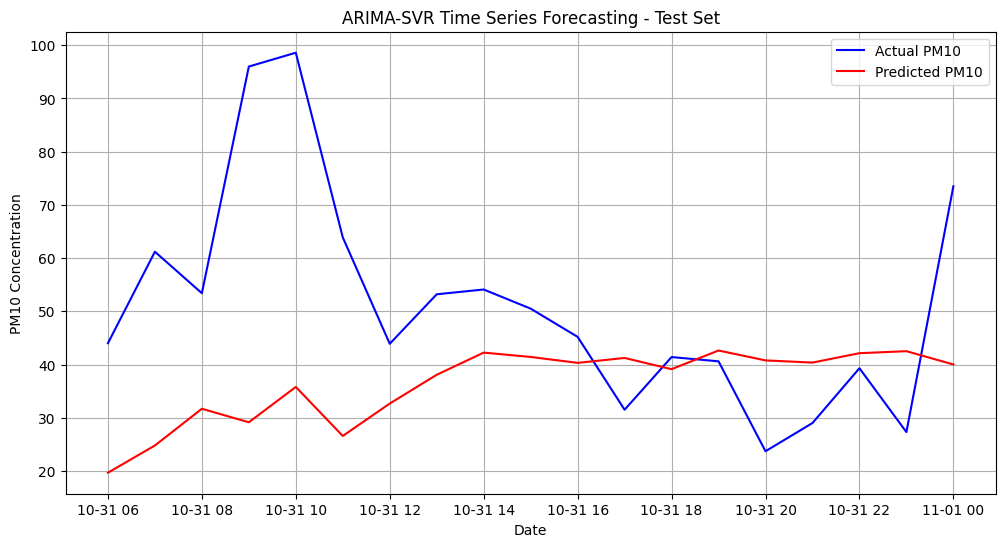

In [55]:
# Importar el archivo CSV con los datos de prueba (últimas 24 horas)
test_data = pd.read_csv('test_data.csv')
test_data['fecha'] = pd.to_datetime(test_data['fecha'])
test_data.set_index('fecha', inplace=True)

# Crear características de entrada (lags) para los datos de prueba
test_lags = create_lags(test_data['pm10'], n_lags)

X_test, y_test = test_lags.drop('pm10', axis=1), test_lags['pm10']

# Estandarizar las características de prueba
X_test_scaled = scaler.transform(X_test)

# Predecir con el modelo ARIMA en el conjunto de prueba
arima_test_pred = arima_fit.forecast(steps=len(y_test))

# Predecir los residuos en el conjunto de prueba
residuals_test_pred = svr.predict(X_test_scaled)

# Ajustar las predicciones de ARIMA con las predicciones de SVR
final_test_pred = arima_test_pred + residuals_test_pred

# Calcular las métricas de evaluación para el conjunto de prueba
test_mae = mean_absolute_error(y_test, final_test_pred)
test_mse = mean_squared_error(y_test, final_test_pred)
test_rmse = np.sqrt(test_mse)
test_mape = np.mean(np.abs((y_test - final_test_pred) / y_test)) * 100

print(f'Test MAE: {test_mae:.3f}')
print(f'Test MSE: {test_mse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
print(f'Test MAPE: {test_mape:.3f}%')

# Visualizar las predicciones en el conjunto de prueba
plt.figure(figsize=(12, 6))
plt.plot(test_lags.index, y_test, label='Actual PM10', color='blue')
plt.plot(test_lags.index, final_test_pred, label='Predicted PM10', color='red')
plt.title('ARIMA-SVR Time Series Forecasting - Test Set')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration')
plt.legend()
plt.grid(True)
plt.show()

# SARIMAX SVR

In [56]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar los datos
data = pd.read_csv('data_input.csv')
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)
data = data.asfreq('H')  # Establecer la frecuencia explícitamente

# Crear características de entrada (lags)
def create_lags(data, n_lags=5):
    df = pd.DataFrame(data)
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df['pm10'].shift(i)
    df = df.dropna()
    return df

n_lags = 5
df_lags = create_lags(data['pm10'], n_lags)

# Dividir los datos en conjuntos de entrenamiento y validación
train_size = int(len(df_lags) * 0.8)
train = df_lags.iloc[:train_size]
val = df_lags.iloc[train_size:]

X_train, y_train = train.drop('pm10', axis=1), train['pm10']
X_val, y_val = val.drop('pm10', axis=1), val['pm10']

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Ajuste del Modelo SARIMAX y Obtención de Residuos:


In [57]:
# Ajustar el modelo SARIMAX
sarimax_order = (2, 1, 2)
seasonal_order = (1, 1, 1, 24)  # Suponiendo estacionalidad diaria
sarimax_model = sm.tsa.statespace.SARIMAX(y_train, order=sarimax_order, seasonal_order=seasonal_order, trend='n')
sarimax_fit = sarimax_model.fit()

# Obtener los residuos del modelo SARIMAX
residuals_train = sarimax_fit.resid

# Ajustar el modelo SARIMAX en el conjunto de validación
sarimax_val_pred = sarimax_fit.predict(start=train_size, end=train_size + len(val) - 1)
residuals_val = y_val - sarimax_val_pred

Entrenar el Modelo SVR con los Residuos:


In [58]:
# Entrenar el modelo SVR con los residuos del modelo SARIMAX
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train_scaled, residuals_train)

# Predecir los residuos en el conjunto de validación
residuals_val_pred = svr.predict(X_val_scaled)

# Ajustar las predicciones de SARIMAX con las predicciones de SVR
final_val_pred = sarimax_val_pred + residuals_val_pred

# Calcular las métricas de evaluación para el conjunto de validación
val_mae = mean_absolute_error(y_val, final_val_pred)
val_mse = mean_squared_error(y_val, final_val_pred)
val_rmse = np.sqrt(val_mse)
val_mape = np.mean(np.abs((y_val - final_val_pred) / y_val)) * 100

print(f'Validation MAE: {val_mae:.3f}')
print(f'Validation MSE: {val_mse:.3f}')
print(f'Validation RMSE: {val_rmse:.3f}')
print(f'Validation MAPE: {val_mape:.3f}%')

Validation MAE: 31.654
Validation MSE: 1409.540
Validation RMSE: 37.544
Validation MAPE: inf%


Predicción con el Conjunto de Prueba:


Test MAE: 53.172
Test MSE: 3338.210
Test RMSE: 57.777
Test MAPE: 102.530%


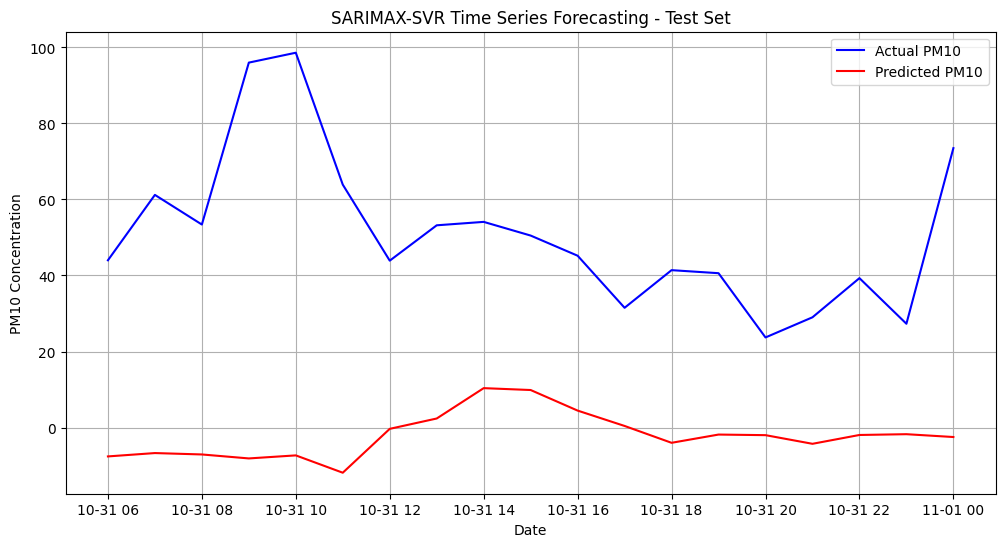

In [59]:
# Importar el archivo CSV con los datos de prueba (últimas 24 horas)
test_data = pd.read_csv('test_data.csv')
test_data['fecha'] = pd.to_datetime(test_data['fecha'])
test_data.set_index('fecha', inplace=True)
test_data = test_data.asfreq('H')  # Establecer la frecuencia explícitamente

# Crear características de entrada (lags) para los datos de prueba
test_lags = create_lags(test_data['pm10'], n_lags)

X_test, y_test = test_lags.drop('pm10', axis=1), test_lags['pm10']

# Estandarizar las características de prueba
X_test_scaled = scaler.transform(X_test)

# Predecir con el modelo SARIMAX en el conjunto de prueba
sarimax_test_pred = sarimax_fit.predict(start=len(y_train) + len(y_val), end=len(y_train) + len(y_val) + len(y_test) - 1)

# Predecir los residuos en el conjunto de prueba
residuals_test_pred = svr.predict(X_test_scaled)

# Ajustar las predicciones de SARIMAX con las predicciones de SVR
final_test_pred = sarimax_test_pred + residuals_test_pred

# Calcular las métricas de evaluación para el conjunto de prueba
test_mae = mean_absolute_error(y_test, final_test_pred)
test_mse = mean_squared_error(y_test, final_test_pred)
test_rmse = np.sqrt(test_mse)
test_mape = np.mean(np.abs((y_test - final_test_pred) / y_test)) * 100

print(f'Test MAE: {test_mae:.3f}')
print(f'Test MSE: {test_mse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
print(f'Test MAPE: {test_mape:.3f}%')

# Visualizar las predicciones en el conjunto de prueba
plt.figure(figsize=(12, 6))
plt.plot(test_lags.index, y_test, label='Actual PM10', color='blue')
plt.plot(test_lags.index, final_test_pred, label='Predicted PM10', color='red')
plt.title('SARIMAX-SVR Time Series Forecasting - Test Set')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration')
plt.legend()
plt.grid(True)
plt.show()